In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import time_series_transform.base as base
from time_series_transform.util import *
from time_series_transform.stock_transform.base import *
from time_series_transform.stock_transform.stock_extractor import *

In [2]:
import yfinance as yf
class yahoo_stock(object):

    """
    Fetching stock data from yahoo finance
    
    API Document: 
    - https://github.com/ranaroussi/yfinance
    - https://pypi.org/project/fix-yahoo-finance/0.1.0/
    ---
    Require:
    - yfinance

    """
    def __init__(self,symbol):
        self._symbol = symbol
        self._ticker = self._getStock(symbol)
    

    # getter and setter
    @property
    def ticker(self):
        return self._ticker

    @property
    def symbol(self):
        return self._symbol

    @symbol.setter
    def symbol(self, symbol):
        self._symbol = symbol
        self._ticker = yf.Ticker(symbol)
    
    def _getStock(self, symbol):
        ticker = yf.Ticker(symbol)
        return ticker

    def getCompanyInfo(self):
        return self.ticker.info

    """
    Historical Data
    ---
    Input:
    symbol: string
    period: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
    (default is '1mo')
    start_date, end_date: String, "%Y-%m-%d", eg "2020-02-20"
    ---
    Return:
    date, open, high, low, close, volume, dividends, stock splits
    """

    def getHistoricalByPeriod(self, period = '1mo'):
        return self.ticker.history(period)

    def getHistoricalByRange(self, start_date, end_date):
        return self.ticker.history(start = start_date, end = end_date)

    def getActions(self):
        return self.ticker.actions

    def getDividends(self):
        return self.ticker.dividends

    def getSplits(self):
        return self.ticker.splits

    def getSustainability(self):
        return self.ticker.sustainability

    def getRecommendations(self):
        return self.ticker.recommendations

    def getNextEvent(self):
        return self.ticker.calendar

    def getCashFlow(self):
        return self.ticker.cashflow

    def getAdditionalInfo(self):
        pass
    
# yy = yahoo_stock('0050.TW')
# yy.getHistoricalByPeriod()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-16,88.15,89.20,88.15,88.90,10841047,0,0
2020-06-17,89.20,89.20,88.30,89.00,11510236,0,0
2020-06-18,89.05,89.30,88.35,88.90,5035751,0,0
2020-06-19,89.00,89.15,88.65,88.85,2333985,0,0
2020-06-22,88.85,89.70,88.85,89.05,10579456,0,0
2020-06-23,89.60,90.05,88.80,89.45,8664889,0,0
2020-06-24,89.80,90.50,89.80,90.00,10061904,0,0
2020-06-29,89.25,89.60,88.65,89.10,9785007,0,0
2020-06-30,89.55,89.95,89.40,89.90,8035137,0,0


In [2]:
se = Stock_Extractor('googl', 'yahoo')
stock = se.get_stock_period('1y')
stock.save(r"C:\Users\User\Documents\Development\Time-Series-Transformer\Data")

In [5]:
pe = Portfolio_Extractor(['shop.to','0051.TW','0050.TW'],'yahoo')
port = pe.get_portfolio_period('1y')

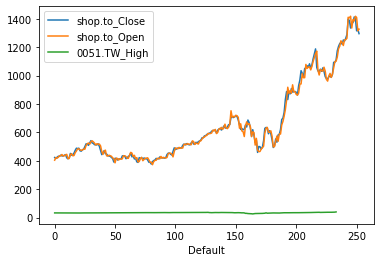

In [6]:
port.plot({'shop.to':['Close','Open'],'0051.TW':['High']},samePlot= True)

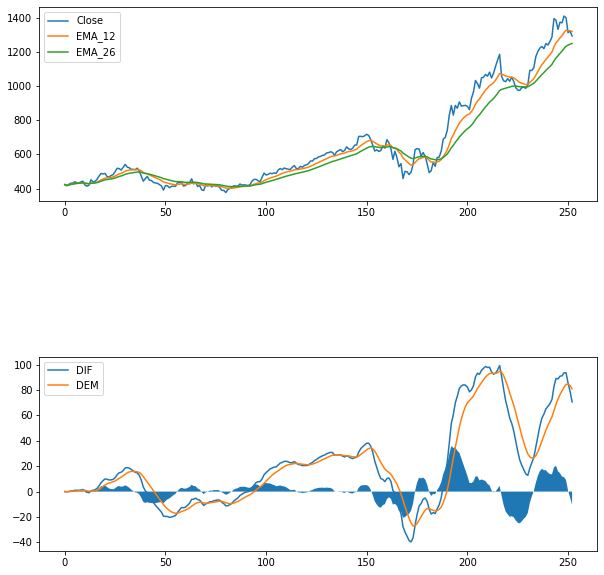

In [8]:
x = port.stockDict['shop.to']
x.macd_plot('Close')
# x.df

In [4]:
df = pd.read_csv('Data/aapl_stock_extract.csv')
df2 = pd.read_csv('Data/googl_stock_extract.csv')

stock = Stock('aapl',df)
stock2 = Stock('googl',df2)

port = Portfolio([stock,stock2])
port.make_technical_indicator('High','mvg10',moving_average,1,50,windowSize = 10)
port.make_technical_indicator('High','fft',rfft_transform,1,50)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished


In [5]:
port.get_portfolio_dataFrame()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_mvg10,High_fft,symbol
0,2019-07-16,202.18,203.68,201.10,202.09,16866800,0.0,0,NaN,NaN,aapl
1,2019-07-17,201.64,202.67,200.87,200.95,14107500,0.0,0,NaN,285.600897,aapl
2,2019-07-18,201.59,203.45,201.30,203.23,18582200,0.0,0,NaN,255.962488,aapl
3,2019-07-19,203.36,204.06,199.97,200.20,20929300,0.0,0,NaN,229.843708,aapl
4,2019-07-22,201.25,204.79,201.21,204.78,22277900,0.0,0,NaN,209.426162,aapl
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-09,1509.93,1529.14,1495.59,1518.66,2091800,0.0,0,1470.997,1562.511647,googl
249,2020-07-10,1513.25,1541.34,1500.72,1539.01,1795900,0.0,0,1480.899,1544.613797,googl
250,2020-07-13,1549.94,1576.36,1506.56,1512.23,2147700,0.0,0,1494.833,1507.688227,googl
251,2020-07-14,1492.79,1522.80,1485.93,1520.86,1905400,0.0,0,1507.313,1454.074590,googl


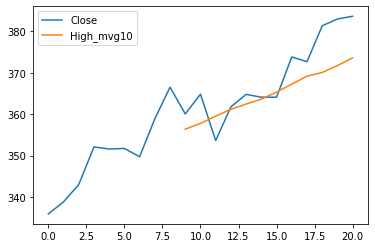

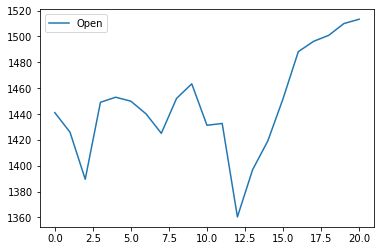

In [5]:
stockIndicators = {
    'aapl':['Close','High_mvg10'],
    'googl':['Open']
}
# port.plot(stockIndicators, samePlot = False)
port.plot(stockIndicators, keyCol = 'Date',samePlot = False)
 

In [7]:
x = stock.df[['Date','Close']].drop(2).set_index('Date')
y = stock.df[['Date', 'Open']].set_index('Date')
w = stock2.df[['Date','High']].set_index('Date')
df = [x,y,w]

# z = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='outer'), df)
# # z = pd.merge(x,y, left_on= 'Date',right_on='Date')
# z
# z.plot()
stock.macd('Close')
# stock.macd_plot('Close')

,Close,EMA_12,EMA_26,DIF,DEM,OSC
0,335.90,335.900000,335.900000,0.000000,0.000000,0.000000
1,338.80,337.470833,337.405769,0.065064,0.036147,0.028917
2,342.99,339.624965,339.412129,0.212836,0.108560,0.104276
3,352.08,343.556533,342.953512,0.603021,0.276061,0.326960
4,351.59,345.739197,344.956349,0.782848,0.426818,0.356030
5,351.73,347.195278,346.313058,0.882220,0.550258,0.331962
6,349.72,347.758661,346.918965,0.839696,0.623507,0.216189
7,358.87,350.077426,348.844573,1.232853,0.769944,0.462909
8,366.53,353.332331,351.465941,1.866389,1.023228,0.843161
9,360.06,354.607221,352.651838,1.955384,1.232085,0.723298


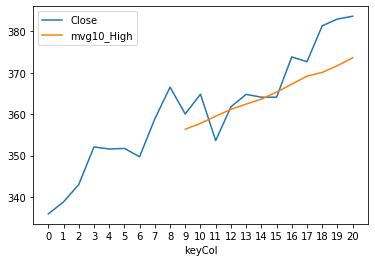

In [22]:

stockIndicators = {
    'aapl':['Date','Close','High_mvg10'],
    'googl':['Open']
}

keyArr = [i for i in range(port.stockDict['aapl'].df.shape[0])]
x = port.stockDict['aapl'].df[stockIndicators['aapl']]
x.insert(0,'keyCol',keyArr)
x = x.set_index('keyCol')
x.plot(xticks=x.index)
# plt.plot(x)
# x

In [19]:
import pandas as pd
x = [i for i in range(20)]
df = pd.DataFrame(data = x, columns = ['omg'])
df2 = pd.DataFrame(data = x, columns = ['omg1'])
df2['omg2'] = x
# for i,ix in enumerate(x):
#     print(i)
#     print(ix)
# x.ewm(span=2)
xx = df.rolling(9,min_periods = 1)


In [6]:
stock.df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_mvg10,High_fft,symbol
0,2019-07-16,202.18,203.68,201.10,202.09,16866800,0.0,0,NaN,NaN,aapl
1,2019-07-17,201.64,202.67,200.87,200.95,14107500,0.0,0,NaN,285.600897,aapl
2,2019-07-18,201.59,203.45,201.30,203.23,18582200,0.0,0,NaN,255.962488,aapl
3,2019-07-19,203.36,204.06,199.97,200.20,20929300,0.0,0,NaN,229.843708,aapl
4,2019-07-22,201.25,204.79,201.21,204.78,22277900,0.0,0,NaN,209.426162,aapl
...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-09,385.05,385.27,378.69,383.01,31410700,0.0,0,371.747,395.668925,aapl
249,2020-07-10,381.34,383.92,378.82,383.68,22564300,0.0,0,373.639,385.523832,aapl
250,2020-07-13,389.06,399.82,381.03,381.91,47912300,0.0,0,377.089,368.148149,aapl
251,2020-07-14,379.36,389.02,375.51,388.23,42747300,0.0,0,379.774,344.380404,aapl


In [7]:
stochastic_oscillator(stock.df)

C:\Users\User\Documents\Development\Time-Series-Transformer\time_series_transform\stock_transform\base.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k_val'] = k_list[1:]
C:\Users\User\Documents\Development\Time-Series-Transformer\time_series_transform\stock_transform\base.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['d_val'] = d_list[1:]


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,High_mvg10,High_fft,symbol,rsv,k_val,d_val
9,2019-07-29,206.00,208.16,205.98,207.21,21673400,0.0,0,205.397,202.314117,aapl,100.000000,66.666667,55.555556
10,2019-07-30,206.30,207.68,204.87,206.32,33935700,0.0,0,205.797,210.002507,aapl,87.303852,73.545728,61.552280
11,2019-07-31,213.87,218.76,208.81,210.53,69281400,0.0,0,207.406,215.997097,aapl,100.000000,82.363819,68.489460
12,2019-08-01,211.38,215.46,204.30,205.97,54017900,0.0,0,208.607,218.993220,aapl,23.361345,62.696327,66.558415
13,2019-08-02,203.11,204.00,199.25,201.61,40862100,0.0,0,208.601,218.512016,aapl,0.000000,41.797552,58.304794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,2020-07-09,385.05,385.27,378.69,383.01,31410700,0.0,0,371.747,395.668925,aapl,100.000000,95.161145,89.554330
249,2020-07-10,381.34,383.92,378.82,383.68,22564300,0.0,0,373.639,385.523832,aapl,100.000000,96.774097,91.960919
250,2020-07-13,389.06,399.82,381.03,381.91,47912300,0.0,0,377.089,368.148149,aapl,90.955544,94.834579,92.918806
251,2020-07-14,379.36,389.02,375.51,388.23,42747300,0.0,0,379.774,344.380404,aapl,100.000000,96.556386,94.131332


[nan, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37]